## Importing Libraries

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

## Reading the Data

In [63]:
#Reading the data from csv into a pandas data frame
df = pd.read_csv("/content/drive/MyDrive/income_evaluation.csv", index_col=None)

In [64]:
#Finding the number of dimensions of the data
df.shape

(32561, 15)

In [65]:
#Visualising first 5 rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Pre processing

## Data Cleaning

In [66]:
#removing space from the column header
df.columns = df.columns.str.replace(' ', '')

In [67]:
#Checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [68]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [69]:
#Removing the rows with other anamolies like '?' 
for value in df.columns:
    df[value].replace(' ?', np.nan, inplace = True)
    df[value].replace(' #NAME?', np.nan, inplace = True)

df = df.dropna().reset_index(drop = 'index')

## Feature Selection

In [70]:
df = df.drop(['relationship', 'education-num', 'race', 'sex', 'native-country'], axis=1)

## Setting the input features and target variable

In [71]:
X = df.drop('income', axis=1)
y = df['income']

In [72]:
X[:3]

,age,workclass,fnlwgt,education,marital-status,occupation,capital-gain,capital-loss,hours-per-week
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,0,0,13
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,0,0,40


In [73]:
y = [0 if x == ' <=50K' else 1 for x in y]
y[:3]

[0, 0, 0]

## Label Encoding

In [74]:
#Checking the categorical variables
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 7 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 14 unique categories


In [75]:
le = LabelEncoder()
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
      X[col_name] = le.fit_transform(X[col_name])

## Feature Scaling - Standardisation

In [76]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.04279571,  2.93600035, -1.0627216 , ...,  0.14609228,
        -0.21858598, -0.07773411],
       [ 0.88028814,  1.88768202, -1.00787131, ..., -0.14744462,
        -0.21858598, -2.3315307 ],
       [-0.03333996, -0.20895464,  0.24469349, ..., -0.14744462,
        -0.21858598, -0.07773411],
       ...,
       [ 1.48937355, -0.20895464, -0.3585745 , ..., -0.14744462,
        -0.21858598, -0.07773411],
       [-1.25151078, -0.20895464,  0.11070545, ..., -0.14744462,
        -0.21858598, -1.74721307],
       [ 1.0325595 ,  0.83936369,  0.92884082, ...,  1.88111954,
        -0.21858598, -0.07773411]])

## Splitting Training and validation data

In [77]:
# Splitting the dataset into the Training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

## Fitting various classification models to the cleaned data

### 1. Logistic regression

In [78]:
#Model Fitting
lr = LogisticRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = lr.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      4531
           1       0.71      0.30      0.42      1502

    accuracy                           0.80      6033
   macro avg       0.76      0.63      0.65      6033
weighted avg       0.78      0.80      0.76      6033


 Training Accuracy Score: 0.7933

 Validation Accuracy Score: 0.7953

 Precision Score: 0.7076

 Recall Score: 0.3029

 f1_score: 0.4242

 Error: 0.2047

 Confusion Matrix 
 [[4343  188]
 [1047  455]]


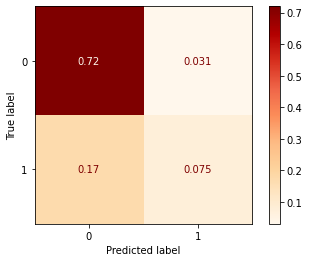

In [79]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred_lr))
print('\n Training Accuracy Score: {:.4f}'.format(lr.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred_lr)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred_lr)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred_lr)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred_lr)))

#Calculating Error
cm_lr = confusion_matrix(y_valid, y_pred_lr)
Err_lr = (cm_lr[1][0]+cm_lr[0][1])/(cm_lr[0][0] + cm_lr[0][1] + cm_lr[1][0] + cm_lr[1][1])
print('\n Error: {:.4f}'.format(Err_lr))

print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred_lr)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_lr, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

### Naive Bayes

In [80]:
#Fitting the model
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_nb = nb.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4531
           1       0.67      0.31      0.42      1502

    accuracy                           0.79      6033
   macro avg       0.74      0.63      0.65      6033
weighted avg       0.77      0.79      0.76      6033


 Training Accuracy Score: 0.7892

 Validation Accuracy Score: 0.7908

 Precision Score: 0.6739

 Recall Score: 0.3096

 f1_score: 0.4243

 Error: 0.2092

 Confusion Matrix 
 [[4306  225]
 [1037  465]]


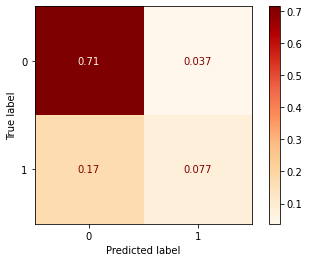

In [81]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred_nb))
print('\n Training Accuracy Score: {:.4f}'.format(nb.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred_nb)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred_nb)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred_nb)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred_nb)))

#Calculating Error
cm_nb = confusion_matrix(y_valid, y_pred_nb)
Err_nb = (cm_nb[1][0]+cm_nb[0][1])/(cm_nb[0][0] + cm_nb[0][1] + cm_nb[1][0] + cm_nb[1][1])
print('\n Error: {:.4f}'.format(Err_nb))

print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred_nb)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_nb, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

### Support Vector Machine

In [82]:
#Model Fitting
svc = SVC()

# Train the model using the training sets
svc.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_svc = svc.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4531
           1       0.79      0.41      0.54      1502

    accuracy                           0.83      6033
   macro avg       0.81      0.69      0.72      6033
weighted avg       0.82      0.83      0.81      6033


 Training Accuracy Score: 0.8277

 Validation Accuracy Score: 0.8263

 Precision Score: 0.7873

 Recall Score: 0.4141

 f1_score: 0.5428

 Error: 0.1737

 Confusion Matrix 
 [[4363  168]
 [ 880  622]]


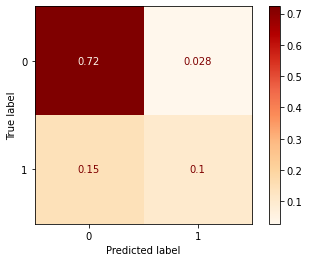

In [83]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred_svc))
print('\n Training Accuracy Score: {:.4f}'.format(svc.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred_svc)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred_svc)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred_svc)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred_svc)))

#Calculating Error
cm_svc = confusion_matrix(y_valid, y_pred_svc)
Err_svc = (cm_svc[1][0]+cm_svc[0][1])/(cm_svc[0][0] + cm_svc[0][1] + cm_svc[1][0] + cm_svc[1][1])
print('\n Error: {:.4f}'.format(Err_svc))


print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred_svc)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_svc, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

### Decision Tree

In [84]:
#Model Fitting
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the model using the training sets
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4531
           1       0.60      0.60      0.60      1502

    accuracy                           0.80      6033
   macro avg       0.74      0.73      0.74      6033
weighted avg       0.80      0.80      0.80      6033


 Training Accuracy Score: 1.0000

 Validation Accuracy Score: 0.8028

 Precision Score: 0.6047

 Recall Score: 0.5999

 f1_score: 0.6023

 Error: 0.1972

 Confusion Matrix 
 [[3942  589]
 [ 601  901]]


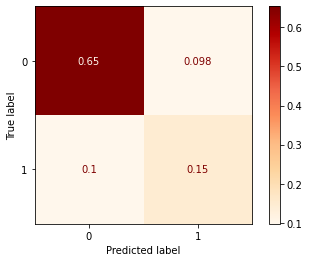

In [85]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred_dt))
print('\n Training Accuracy Score: {:.4f}'.format(dt.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred_dt)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred_dt)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred_dt)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred_dt)))

#Calculating Error
cm_dt = confusion_matrix(y_valid, y_pred_dt)
Err_dt = (cm_dt[1][0]+cm_dt[0][1])/(cm_dt[0][0] + cm_dt[0][1] + cm_dt[1][0] + cm_dt[1][1])
print('\n Error: {:.4f}'.format(Err_dt))

print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred_dt)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_dt, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

### Random Forest - Basic Model

In [86]:
#Random Forest - Initial model
RF_b = RandomForestClassifier(n_estimators = 10, max_depth=None, 
                            random_state = 42, max_features = 'auto',
                            min_samples_split = 2)
RF_b.fit(X_train, y_train)
y_pred_b = RF_b.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4531
           1       0.74      0.57      0.65      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.84      0.84      0.84      6033


 Training Accuracy Score: 0.9873

 Validation Accuracy Score: 0.8432

 Precision Score: 0.7388

 Recall Score: 0.5726

 f1_score: 0.6452

 Error: 0.1568

 Confusion Matrix 
 [[4227  304]
 [ 642  860]]


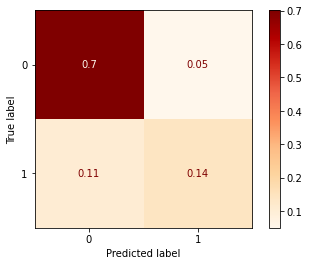

In [87]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred_b))
print('\n Training Accuracy Score: {:.4f}'.format(RF_b.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred_b)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred_b)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred_b)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred_b)))

#Calculating Error
cm_RF_b = confusion_matrix(y_valid, y_pred_b)
Err_RF_b = (cm_RF_b[1][0]+cm_RF_b[0][1])/(cm_RF_b[0][0] + cm_RF_b[0][1] + cm_RF_b[1][0] + cm_RF_b[1][1])
print('\n Error: {:.4f}'.format(Err_RF_b))

print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred_b)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred_b, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

### Random Forest - hyper parameter tuning

In [88]:
for n_estimators in range(20,300,20):
    print('Accuracy score using n_estimators =', n_estimators, end = ': ')
    RF = RandomForestClassifier(n_estimators = n_estimators, max_depth=None, 
                            random_state = 42, max_features = 'auto',
                            min_samples_split = 2)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_valid)
    print(accuracy_score(y_valid, y_pred))

Accuracy score using n_estimators = 20: 0.8465108569534229
Accuracy score using n_estimators = 40: 0.8481684070943146
Accuracy score using n_estimators = 60: 0.8493286921929388
Accuracy score using n_estimators = 80: 0.850488977291563
Accuracy score using n_estimators = 100: 0.8499917122492956
Accuracy score using n_estimators = 120: 0.8511519973479198
Accuracy score using n_estimators = 140: 0.8511519973479198
Accuracy score using n_estimators = 160: 0.852312282446544
Accuracy score using n_estimators = 180: 0.8501574672633847
Accuracy score using n_estimators = 200: 0.8501574672633847
Accuracy score using n_estimators = 220: 0.8488314271506713
Accuracy score using n_estimators = 240: 0.8480026520802254
Accuracy score using n_estimators = 260: 0.849494447207028
Accuracy score using n_estimators = 280: 0.8499917122492956


In [89]:
for max_depth in range(1,20):
    print('Accuracy score using max_depth =', max_depth, end = ': ')
    RF = RandomForestClassifier(n_estimators = 160, max_depth=max_depth, 
                            random_state = 42, max_features = 'auto',
                            min_samples_split = 2)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_valid)
    print(accuracy_score(y_valid, y_pred))

Accuracy score using max_depth = 1: 0.7692690203878667
Accuracy score using max_depth = 2: 0.797778882811205
Accuracy score using max_depth = 3: 0.8075584286424664
Accuracy score using max_depth = 4: 0.8148516492623902
Accuracy score using max_depth = 5: 0.8148516492623902
Accuracy score using max_depth = 6: 0.8194927896568871
Accuracy score using max_depth = 7: 0.8352395159953588
Accuracy score using max_depth = 8: 0.8465108569534229
Accuracy score using max_depth = 9: 0.8511519973479198
Accuracy score using max_depth = 10: 0.8546328526437925
Accuracy score using max_depth = 11: 0.8576164428973977
Accuracy score using max_depth = 12: 0.8586109729819327
Accuracy score using max_depth = 13: 0.8577821979114868
Accuracy score using max_depth = 14: 0.8572849328692193
Accuracy score using max_depth = 15: 0.859771258080557
Accuracy score using max_depth = 16: 0.8592739930382894
Accuracy score using max_depth = 17: 0.8602685231228244
Accuracy score using max_depth = 18: 0.8601027681087353
Acc

In [90]:
for max_features in np.linspace(0.1,1,10):
    print('Accuracy score using max_features =', max_features, end = ': ')
    RF = RandomForestClassifier(n_estimators = 160, max_depth=18, 
                            random_state = 42, max_features = max_features,
                            min_samples_split = 2)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_valid)
    print(accuracy_score(y_valid, y_pred))

Accuracy score using max_features = 0.1: 0.8552958727001492
Accuracy score using max_features = 0.2: 0.8552958727001492
Accuracy score using max_features = 0.30000000000000004: 0.8594397480523785
Accuracy score using max_features = 0.4: 0.8601027681087353
Accuracy score using max_features = 0.5: 0.8591082380242002
Accuracy score using max_features = 0.6: 0.8567876678269518
Accuracy score using max_features = 0.7000000000000001: 0.8566219128128626
Accuracy score using max_features = 0.8: 0.8564561577987734
Accuracy score using max_features = 0.9: 0.8569534228410409
Accuracy score using max_features = 1.0: 0.8546328526437925


In [91]:
for min_samples_split in range(2,10):
    print('Accuracy score using min_samples_split =', min_samples_split, end = ': ')
    RF = RandomForestClassifier(n_estimators = 160, max_depth=18, 
                            random_state = 42, max_features = 0.4,
                            min_samples_split = min_samples_split)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_valid)
    print(accuracy_score(y_valid, y_pred))

Accuracy score using min_samples_split = 2: 0.8601027681087353
Accuracy score using min_samples_split = 3: 0.8604342781369136
Accuracy score using min_samples_split = 4: 0.8617603182496271
Accuracy score using min_samples_split = 5: 0.8620918282778054
Accuracy score using min_samples_split = 6: 0.8614288082214487
Accuracy score using min_samples_split = 7: 0.8591082380242002
Accuracy score using min_samples_split = 8: 0.8615945632355378
Accuracy score using min_samples_split = 9: 0.8614288082214487


### Random Forest - After hyper parameter tuning

In [92]:
RF = RandomForestClassifier(n_estimators = 180, max_depth=18, 
                            random_state = 42, max_features = 0.4,
                            min_samples_split = 5)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_valid)


 Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.78      0.62      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.86      0.86      0.86      6033


 Training Accuracy Score: 0.9270

 Validation Accuracy Score: 0.8619

 Precision Score: 0.7828

 Recall Score: 0.6165

 f1_score: 0.6898

 Error: 0.1381

 Confusion Matrix 
 [[4274  257]
 [ 576  926]]


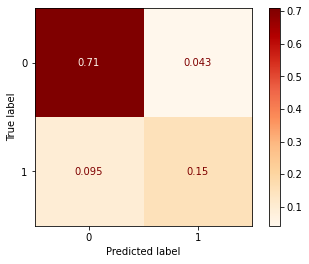

In [93]:
#Evaluation Metrics
print('\n Classification Report: \n',classification_report(y_valid, y_pred))
print('\n Training Accuracy Score: {:.4f}'.format(RF.score(X_train, y_train)))
print('\n Validation Accuracy Score: {:.4f}'.format(accuracy_score(y_valid, y_pred)))
print('\n Precision Score: {:.4f}'.format(precision_score(y_valid, y_pred)))
print('\n Recall Score: {:.4f}'.format(recall_score(y_valid, y_pred)))
print('\n f1_score: {:.4f}'.format(f1_score(y_valid, y_pred)))

#Calculating Error
cm_RF = confusion_matrix(y_valid, y_pred)
Err_RF = (cm_RF[1][0]+cm_RF[0][1])/(cm_RF[0][0] + cm_RF[0][1] + cm_RF[1][0] + cm_RF[1][1])
print('\n Error: {:.4f}'.format(Err_RF))

print('\n Confusion Matrix \n {}' .format(confusion_matrix(y_valid, y_pred)))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred, normalize='all')).plot(cmap=plt.cm.OrRd)
plt.grid(False)

## Feature Importance

In [94]:
importance_value=np.round((RF_b.feature_importances_)*100,2)
importance_features=[(feature,importance1) for feature,importance1 in zip(df.columns,importance_value)]
importance_features=sorted(importance_features,key=lambda x: x[1],reverse=True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in importance_features];

Variable: fnlwgt               Importance: 20.1
Variable: age                  Importance: 18.14
Variable: marital-status       Importance: 13.93
Variable: capital-gain         Importance: 13.09
Variable: hours-per-week       Importance: 8.8
Variable: education            Importance: 8.31
Variable: occupation           Importance: 8.19
Variable: capital-loss         Importance: 5.03
Variable: workclass            Importance: 4.41


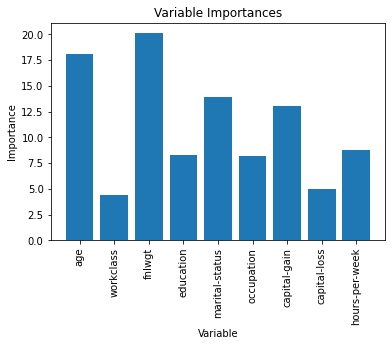

In [95]:
# list of x locations for plotting
x_values = list(range(len(importance_value)))
# Make a bar chart
plt.bar(x_values, importance_value, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');